In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/Users/flaurentkodjodekadjevi/Downloads/data mining 1/train_clean.csv")
df.head(2)

,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,genre,duration_s
0,Long Road,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,True,...,0.536,0.281,0.6350,142.221,241760,4,567.0,141.0,j-dance,241.76
1,"Daniâl My Son, Where Did You Vanish?",False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,False,...,0.934,0.360,0.0336,75.596,444000,4,617.0,155.0,iranian,444.00


In [3]:
#df[['n_beats','n_bars','time_signature','mode','explicit','duration_s']].corr()

In [4]:
df.shape

(14738, 22)

In [5]:
df.columns

Index(['name', 'explicit', 'popularity', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'features_duration_ms', 'time_signature', 'n_beats', 'n_bars', 'genre',
       'duration_s'],
      dtype='object')

In [6]:
df['explicit'].value_counts()

False    13787
True       951
Name: explicit, dtype: int64

In [7]:
# delete useless columns anad keep those columns use in the classification part .
# column to delete are:
del_col=['name','album_name','artists','features_duration_ms']

In [8]:
df.drop(del_col,axis=1,inplace=True)

In [9]:
df.head()

,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,genre,duration_s
0,False,46,0.690,0.513,5,-12.529,True,0.0975,0.302000,0.53600,0.281,0.6350,142.221,4,567.0,141.0,j-dance,241.760
1,False,0,0.069,0.196,1,-24.801,False,0.0805,0.283000,0.93400,0.360,0.0336,75.596,4,617.0,155.0,iranian,444.000
2,False,3,0.363,0.854,2,-7.445,True,0.0397,0.000089,0.80000,0.262,0.4890,116.628,4,652.0,162.0,black-metal,333.506
3,False,23,0.523,0.585,5,-5.607,True,0.0765,0.066400,0.00127,0.117,0.3850,140.880,4,619.0,155.0,bluegrass,269.800
4,False,25,0.643,0.687,7,-11.340,True,0.0539,0.000576,0.09690,0.299,0.6370,143.956,4,733.0,183.0,happy,307.651


In [10]:
# putting popularity into classes
bins = [-1, 25, 50,70,94]
labels =['not_famous','moderately_known','well_known','famous'] 

df['popularity_class']=pd.cut(df['popularity'],bins=bins, labels=labels)
df.drop(['popularity'],axis=1,inplace=True)

In [11]:
df.head(3)

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,genre,duration_s,popularity_class
0,False,0.690,0.513,5,-12.529,True,0.0975,0.302000,0.536,0.281,0.6350,142.221,4,567.0,141.0,j-dance,241.760,moderately_known
1,False,0.069,0.196,1,-24.801,False,0.0805,0.283000,0.934,0.360,0.0336,75.596,4,617.0,155.0,iranian,444.000,not_famous
2,False,0.363,0.854,2,-7.445,True,0.0397,0.000089,0.800,0.262,0.4890,116.628,4,652.0,162.0,black-metal,333.506,not_famous


In [12]:
# descretize continueos attributes
df['danceability_bin']=pd.qcut(df['danceability'],4)
df['energy_bin']=pd.qcut(df['energy'],4)
df['loudness_bin']=pd.qcut(df['loudness'],4)
df['speechiness_bin']=pd.qcut(df['speechiness'],4)
df['acousticness_bin']=pd.qcut(df['acousticness'],4)
df['instrumentalness_bin']=pd.qcut(df['instrumentalness'],4, duplicates='drop')
df['liveness_bin']=pd.qcut(df['liveness'],4)
df['valence_bin']=pd.qcut(df['valence'],4)
df['tempo_bin']=pd.qcut(df['tempo'],4)
df['n_beats_bin']=pd.qcut(df['n_beats'],4)
df['n_bars_bin']=pd.qcut(df['n_bars'],4)
df['duration_s_bin']=pd.qcut(df['duration_s'],4)

In [13]:
df.drop(['danceability','energy','valence','tempo','speechiness','liveness','loudness','acousticness','instrumentalness','n_bars','n_beats','duration_s'], axis=1, inplace=True)

In [14]:
df.columns

Index(['explicit', 'key', 'mode', 'time_signature', 'genre',
       'popularity_class', 'danceability_bin', 'energy_bin', 'loudness_bin',
       'speechiness_bin', 'acousticness_bin', 'instrumentalness_bin',
       'liveness_bin', 'valence_bin', 'tempo_bin', 'n_beats_bin', 'n_bars_bin',
       'duration_s_bin'],
      dtype='object')

In [15]:
df.head()

,explicit,key,mode,time_signature,genre,popularity_class,danceability_bin,energy_bin,loudness_bin,speechiness_bin,acousticness_bin,instrumentalness_bin,liveness_bin,valence_bin,tempo_bin,n_beats_bin,n_bars_bin,duration_s_bin
0,False,5,True,4,j-dance,moderately_known,"(0.582, 0.697]","(0.485, 0.712]","(-46.592, -10.495]","(0.0887, 0.939]","(0.153, 0.565]","(0.00267, 0.733]","(0.278, 0.994]","(0.422, 0.667]","(142.021, 220.525]","(463.0, 627.0]","(118.0, 160.0]","(228.48, 289.21]"
1,False,1,False,4,iranian,not_famous,"(0.052199999999999996, 0.448]","(-0.0009798, 0.485]","(-46.592, -10.495]","(0.0511, 0.0887]","(0.153, 0.565]","(0.733, 1.0]","(0.278, 0.994]","(-0.001, 0.202]","(30.320999999999998, 99.993]","(463.0, 627.0]","(118.0, 160.0]","(289.21, 4120.258]"
2,False,2,True,4,black-metal,not_famous,"(0.052199999999999996, 0.448]","(0.712, 0.885]","(-10.495, -7.259]","(0.0374, 0.0511]","(-0.001, 0.00955]","(0.733, 1.0]","(0.131, 0.278]","(0.422, 0.667]","(99.993, 124.876]","(627.0, 7348.0]","(160.0, 2170.0]","(289.21, 4120.258]"
3,False,5,True,4,bluegrass,not_famous,"(0.448, 0.582]","(0.485, 0.712]","(-7.259, -5.088]","(0.0511, 0.0887]","(0.00955, 0.153]","(-0.001, 0.00267]","(0.0976, 0.131]","(0.202, 0.422]","(124.876, 142.021]","(463.0, 627.0]","(118.0, 160.0]","(228.48, 289.21]"
4,False,7,True,4,happy,not_famous,"(0.582, 0.697]","(0.485, 0.712]","(-46.592, -10.495]","(0.0511, 0.0887]","(-0.001, 0.00955]","(0.00267, 0.733]","(0.278, 0.994]","(0.422, 0.667]","(142.021, 220.525]","(627.0, 7348.0]","(160.0, 2170.0]","(289.21, 4120.258]"


In [16]:
df.columns

Index(['explicit', 'key', 'mode', 'time_signature', 'genre',
       'popularity_class', 'danceability_bin', 'energy_bin', 'loudness_bin',
       'speechiness_bin', 'acousticness_bin', 'instrumentalness_bin',
       'liveness_bin', 'valence_bin', 'tempo_bin', 'n_beats_bin', 'n_bars_bin',
       'duration_s_bin'],
      dtype='object')

In [17]:
#converting attributes in string and adding some letters to make each attribute recognizable with respect to an attribute column it belong to  .
df['key']=df['key'].astype(str)+'_key'
df['time_signature']=df['time_signature'].astype(str)+'_t.sgn'
df['danceability_bin']=df['danceability_bin'].astype(str)+'_danc'
df['energy_bin']=df['energy_bin'].astype(str)+'_energy'
df['loudness_bin']=df['loudness_bin'].astype(str)+'_loud'
df['speechiness_bin']=df['speechiness_bin'].astype(str)+'_speech'
df['acousticness_bin']=df['acousticness_bin'].astype(str)+'_acoust'
df['instrumentalness_bin']=df['instrumentalness_bin'].astype(str)+'_instru'
df['liveness_bin']=df['liveness_bin'].astype(str)+'_liv'
df['valence_bin']=df['valence_bin'].astype(str)+'_val'
df['tempo_bin']=df['tempo_bin'].astype(str)+'_BpM'
df['n_bars_bin']=df['n_bars_bin'].astype(str)+'_nbars'
df['n_beats_bin']=df['n_beats_bin'].astype(str)+'_nbeats'
df['mode']=df['mode'].astype(str)+'_mode'
df['duration_s_bin']=df['duration_s_bin'].astype(str)+'_dur_s'

In [18]:
df.head()

,explicit,key,mode,time_signature,genre,popularity_class,danceability_bin,energy_bin,loudness_bin,speechiness_bin,acousticness_bin,instrumentalness_bin,liveness_bin,valence_bin,tempo_bin,n_beats_bin,n_bars_bin,duration_s_bin
0,False,5_key,True_mode,4_t.sgn,j-dance,moderately_known,"(0.582, 0.697]_danc","(0.485, 0.712]_energy","(-46.592, -10.495]_loud","(0.0887, 0.939]_speech","(0.153, 0.565]_acoust","(0.00267, 0.733]_instru","(0.278, 0.994]_liv","(0.422, 0.667]_val","(142.021, 220.525]_BpM","(463.0, 627.0]_nbeats","(118.0, 160.0]_nbars","(228.48, 289.21]_dur_s"
1,False,1_key,False_mode,4_t.sgn,iranian,not_famous,"(0.052199999999999996, 0.448]_danc","(-0.0009798, 0.485]_energy","(-46.592, -10.495]_loud","(0.0511, 0.0887]_speech","(0.153, 0.565]_acoust","(0.733, 1.0]_instru","(0.278, 0.994]_liv","(-0.001, 0.202]_val","(30.320999999999998, 99.993]_BpM","(463.0, 627.0]_nbeats","(118.0, 160.0]_nbars","(289.21, 4120.258]_dur_s"
2,False,2_key,True_mode,4_t.sgn,black-metal,not_famous,"(0.052199999999999996, 0.448]_danc","(0.712, 0.885]_energy","(-10.495, -7.259]_loud","(0.0374, 0.0511]_speech","(-0.001, 0.00955]_acoust","(0.733, 1.0]_instru","(0.131, 0.278]_liv","(0.422, 0.667]_val","(99.993, 124.876]_BpM","(627.0, 7348.0]_nbeats","(160.0, 2170.0]_nbars","(289.21, 4120.258]_dur_s"
3,False,5_key,True_mode,4_t.sgn,bluegrass,not_famous,"(0.448, 0.582]_danc","(0.485, 0.712]_energy","(-7.259, -5.088]_loud","(0.0511, 0.0887]_speech","(0.00955, 0.153]_acoust","(-0.001, 0.00267]_instru","(0.0976, 0.131]_liv","(0.202, 0.422]_val","(124.876, 142.021]_BpM","(463.0, 627.0]_nbeats","(118.0, 160.0]_nbars","(228.48, 289.21]_dur_s"
4,False,7_key,True_mode,4_t.sgn,happy,not_famous,"(0.582, 0.697]_danc","(0.485, 0.712]_energy","(-46.592, -10.495]_loud","(0.0511, 0.0887]_speech","(-0.001, 0.00955]_acoust","(0.00267, 0.733]_instru","(0.278, 0.994]_liv","(0.422, 0.667]_val","(142.021, 220.525]_BpM","(627.0, 7348.0]_nbeats","(160.0, 2170.0]_nbars","(289.21, 4120.258]_dur_s"


In [19]:
x = df.values.tolist()

In [20]:
#first row of the list of items in the first tract of our dataset
x[0]

[False,
 '5_key',
 'True_mode',
 '4_t.sgn',
 'j-dance',
 'moderately_known',
 '(0.582, 0.697]_danc',
 '(0.485, 0.712]_energy',
 '(-46.592, -10.495]_loud',
 '(0.0887, 0.939]_speech',
 '(0.153, 0.565]_acoust',
 '(0.00267, 0.733]_instru',
 '(0.278, 0.994]_liv',
 '(0.422, 0.667]_val',
 '(142.021, 220.525]_BpM',
 '(463.0, 627.0]_nbeats',
 '(118.0, 160.0]_nbars',
 '(228.48, 289.21]_dur_s']

In [21]:
pip install pyfim

Note: you may need to restart the kernel to use updated packages.


In [22]:
from fim import apriori

# support 20%

In [52]:
# frequent itemset
supp = 20
zmin = 2  # minimum number of items 

itemsets = apriori(x, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"((0.131, 0.278]_liv, 4_t.sgn)",21.583661
1,"((0.131, 0.278]_liv, 4_t.sgn, False)",20.029855
2,"((0.131, 0.278]_liv, False)",22.689646
3,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats)",21.929706
4,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats, ...",20.959425
...,...,...
161,"(not_famous, False)",48.690460
162,"(True_mode, 4_t.sgn)",55.590989
163,"(True_mode, 4_t.sgn, False)",52.463021
164,"(True_mode, False)",59.675668


In [24]:
# closed itemset
supp = 20 
zmin = 2  # minimum number of items

itemsets = apriori(x, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((0.131, 0.278]_liv, 4_t.sgn)",21.583661
1,"((0.131, 0.278]_liv, 4_t.sgn, False)",20.029855
2,"((0.131, 0.278]_liv, False)",22.689646
3,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats)",21.929706
4,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats, ...",20.959425
...,...,...
160,"(not_famous, False)",48.690460
161,"(True_mode, 4_t.sgn)",55.590989
162,"(True_mode, 4_t.sgn, False)",52.463021
163,"(True_mode, False)",59.675668


In [25]:
# maximal itemset
itemsets = apriori(x, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((0.131, 0.278]_liv, 4_t.sgn, False)",20.029855
1,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats, ...",20.959425
2,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats, ...",20.620166
3,"((118.0, 160.0]_nbars, 4_t.sgn, False)",21.115484
4,"((160.0, 2170.0]_nbars, (627.0, 7348.0]_nbeats...",20.077351
...,...,...
56,"(moderately_known, 4_t.sgn, False)",28.816664
57,"(False_mode, not_famous)",20.341973
58,"(False_mode, 4_t.sgn, False)",29.895508
59,"((-0.001, 0.00267]_instru, True_mode, 4_t.sgn,...",27.764961


Text(0, 0.5, 'itemsets')

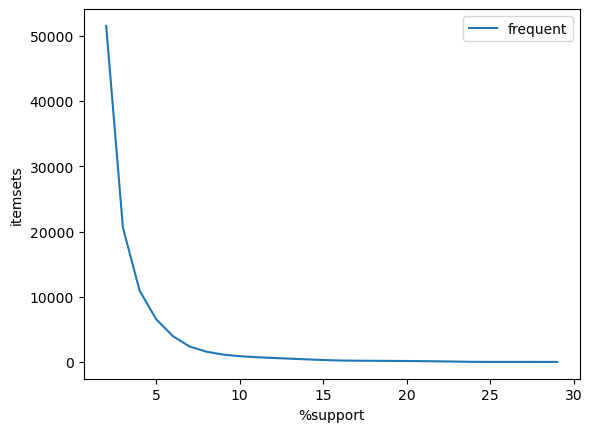

In [26]:
# frequent itemset curve
len_fr_it = []
max_supp = 30
for i in range(2, max_supp):
    fr_itemsets = apriori(x, target="s", supp=i, zmin=zmin)
    len_fr_it.append(len(fr_itemsets))
plt.plot(np.arange(2, max_supp), len_fr_it, label="frequent")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

Text(0, 0.5, 'itemsets')

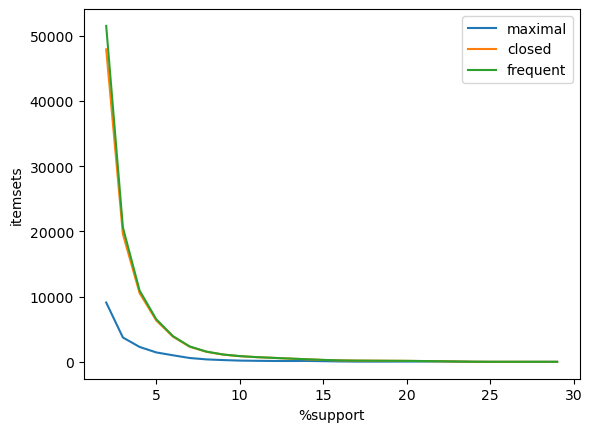

In [27]:
# frequent, closed and maximal curves
len_max_it = []
len_cl_it = []
len_fr_it = []
max_supp = 30
for i in range(2, max_supp):
    max_itemsets = apriori(x, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(x, target="c", supp=i, zmin=zmin)
    fr_itemsets = apriori(x, target="s", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))
    len_fr_it.append(len(fr_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.plot(np.arange(2, max_supp), len_fr_it, label="frequent")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

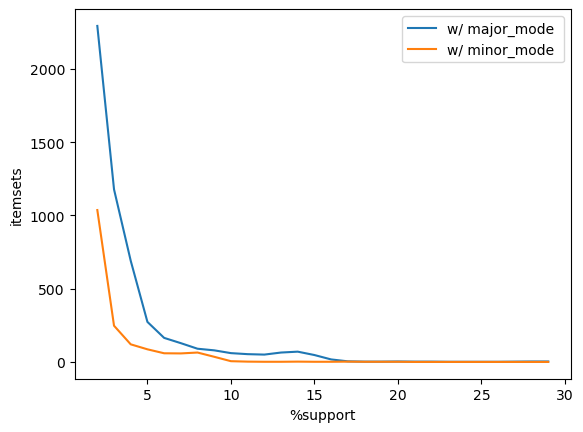

In [28]:
# how mode value behave in maximal itemset 
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(x, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "True_mode" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "False_mode" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ major_mode ")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ minor_mode")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

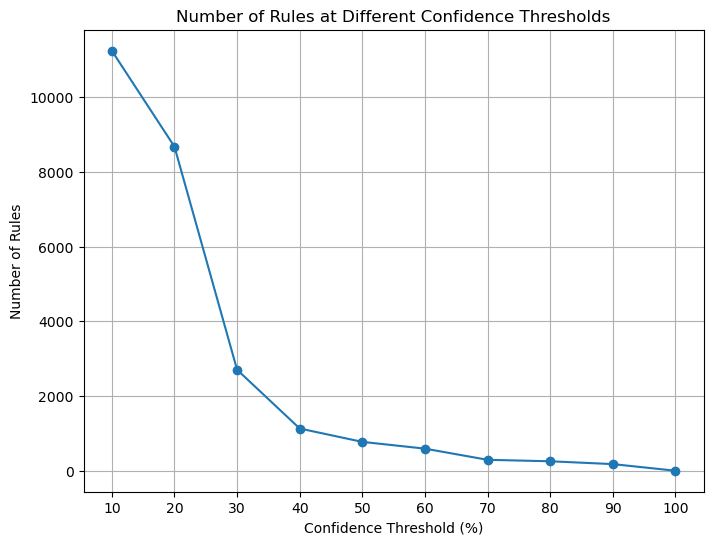

In [29]:
# plot of how the number of rules changes with respect to the confidence threshold 
conf = 10
rules = apriori(x, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

confidence_thresholds = np.arange(10, 101, 10) 
rule_counts = []

for threshold in confidence_thresholds:
    # Count the number of rules with confidence >= current threshold
    count = rules_df[rules_df['confidence'] >= threshold / 100.0].shape[0]
    rule_counts.append(count)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(confidence_thresholds, rule_counts, marker='o')  # 'o' adds circle markers to each point

plt.xlabel('Confidence Threshold (%)')
plt.ylabel('Number of Rules')
plt.title('Number of Rules at Different Confidence Thresholds')
plt.xticks(confidence_thresholds)  # Set x-ticks to be the confidence thresholds
plt.grid(True)
plt.show()

In [30]:
# rule generation
conf = 60
rules = apriori(x, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
rules_df
rules_df.sort_values(by="lift", axis=0, ascending=False).head(200)

,consequent,antecedent,abs_support,%_support,confidence,lift
48,"(627.0, 7348.0]_nbeats","((160.0, 2170.0]_nbars, 4_t.sgn)",3094,20.993351,0.999354,4.007749
45,"(627.0, 7348.0]_nbeats","((160.0, 2170.0]_nbars, 4_t.sgn, False)",2959,20.077351,0.999325,4.007631
501,"(7.999, 84.0]_nbars","((35.999, 331.0]_nbeats, 4_t.sgn)",3032,20.572669,1.000000,3.924900
52,"(160.0, 2170.0]_nbars","((627.0, 7348.0]_nbeats, False)",3299,22.384313,0.938816,3.804309
51,"(627.0, 7348.0]_nbeats","((160.0, 2170.0]_nbars, False)",3299,22.384313,0.948534,3.803943
...,...,...,...,...,...,...
547,True_mode,"(moderately_known, False)",3198,21.699009,0.668059,1.055290
458,False,"((0.0218, 0.0374]_speech, 4_t.sgn)",3236,21.956846,0.986886,1.054960
350,True_mode,"((0.448, 0.582]_danc, 4_t.sgn)",2214,15.022391,0.667471,1.054360
351,True_mode,"((0.448, 0.582]_danc, False)",2306,15.646628,0.666667,1.053090


In [31]:
rules_df[rules_df["consequent"]==False].head(10)

,consequent,antecedent,abs_support,%_support,confidence,lift
4,False,"((0.131, 0.278]_liv, 4_t.sgn)",2952,20.029855,0.928010,0.992022
7,False,"((0.131, 0.278]_liv,)",3344,22.689646,0.923247,0.986931
11,False,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats, ...",2903,19.697381,0.939786,1.004611
18,False,"((118.0, 160.0]_nbars, (463.0, 627.0]_nbeats)",3039,20.620166,0.940285,1.005144
27,False,"((118.0, 160.0]_nbars, 4_t.sgn)",3112,21.115484,0.940181,1.005033
30,False,"((118.0, 160.0]_nbars,)",3417,23.184964,0.941322,1.006253
43,False,"((160.0, 2170.0]_nbars, (627.0, 7348.0]_nbeats...",2959,20.077351,0.956367,1.022335
50,False,"((160.0, 2170.0]_nbars, (627.0, 7348.0]_nbeats)",3299,22.384313,0.956509,1.022487
71,False,"((160.0, 2170.0]_nbars, 4_t.sgn)",2961,20.090921,0.956395,1.022366
74,False,"((160.0, 2170.0]_nbars,)",3478,23.598860,0.956283,1.022245


In [32]:
rule_df_1= rules_df[rules_df["consequent"]=='True_mode']
select_df=rule_df_1[rule_df_1['lift']>=1.06]
select_df

,consequent,antecedent,abs_support,%_support,confidence,lift
193,True_mode,"((0.565, 0.996]_acoust, False)",2452,16.637264,0.679036,1.072630
194,True_mode,"((0.565, 0.996]_acoust,)",2484,16.854390,0.674817,1.065964
349,True_mode,"((0.448, 0.582]_danc, 4_t.sgn, False)",2107,14.296377,0.671233,1.060303
454,True_mode,"((0.0218, 0.0374]_speech, 4_t.sgn, False)",2237,15.178450,0.691286,1.091979
455,True_mode,"((0.0218, 0.0374]_speech, 4_t.sgn)",2257,15.314154,0.688320,1.087294
456,True_mode,"((0.0218, 0.0374]_speech, False)",2510,17.030805,0.687860,1.086568
457,True_mode,"((0.0218, 0.0374]_speech,)",2530,17.166508,0.684894,1.081884
470,True_mode,"((-0.0009798, 0.485]_energy, False)",2472,16.772968,0.680804,1.075423
471,True_mode,"((-0.0009798, 0.485]_energy,)",2507,17.010449,0.677568,1.070310
533,True_mode,"(moderately_known, (-0.001, 0.00267]_instru)",2131,14.459221,0.682138,1.077530


In [33]:
#trying to predict the major mode (True_mode) with the last rule of 'select_df'
print("to_predict:", [r for r in rules if r[0] == 'True_mode'][0][0])
print("how?", [r for r in rules if r[0] == 'True_mode'][181][1])

to_predict: True_mode
how? ('(-0.001, 0.00267]_instru', False)


## Try to TEST some rules on the dataset 


#import test data set and trying to test a rule 

In [34]:
test = pd.read_csv('/Users/flaurentkodjodekadjevi/Downloads/data mining 1/test.csv')

In [35]:
test.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Untrue,206826,False,32,Coal Chamber,Chamber Music,0.383,0.951,0,-3.743,...,0.2610,0.668,110.584,206827,4.0,385.0,96.0,NaN,3.349057,industrial
1,High Roller,329733,False,41,The Crystal Method,Vegas,0.464,0.579,5,-9.136,...,0.0992,0.140,171.752,329733,4.0,935.0,235.0,NaN,1.279305,breakbeat
2,Na Tum Jano Na Hum (ReVibe),136000,False,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.778,9,-4.803,...,0.1390,0.285,90.024,136000,4.0,200.0,49.0,NaN,1.343558,indian
3,いじわるなハロー,247040,False,25,Perfume,Cling Cling,0.500,0.958,0,-1.695,...,0.7320,0.955,130.059,247040,4.0,526.0,132.0,NaN,3.349057,j-idol
4,Hit The Ceiling,208120,False,0,Audio Bullys,Ego War,0.802,0.684,1,-8.839,...,0.2360,0.637,130.022,208120,4.0,440.0,110.0,NaN,2.367412,breakbeat


In [36]:
# Frequencies of mode
mode_frequencies = {
    1.0: 0.631374,
    0.0: 0.368626
}
#Estract keys and values
mode_values = list(mode_frequencies.keys())
mode_probabilities = list(mode_frequencies.values())

# generate random values with probabilities that we have
mode_nan_count = test['mode'].isna().sum()  # number of NaNs
np.random.seed(0)
mode_random_values = np.random.choice(mode_values, size=mode_nan_count, p=mode_probabilities)
# fill NaNs values
test.loc[test['mode'].isna(), 'mode'] = mode_random_values

In [37]:
test['mode'].value_counts(normalize=True)

1.0    0.6356
0.0    0.3644
Name: mode, dtype: float64

In [38]:
test['mode'].isna().sum()

0

In [39]:
# trying to look for antecedent that can predict a binary consequent "True_mode" --> that is in reality a value 1.0 of the attribute 'mode'
print("to_predict:", [r for r in rules if r[0] == 'True_mode'][0][0])
print("how?", [r for r in rules if r[0] == 'True_mode'][181][1])

to_predict: True_mode
how? ('(-0.001, 0.00267]_instru', False)


# test

In [40]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [43]:
# 566	True_mode	((-0.001, 0.00267]_instru,)	4874	33.070973	0.661240	1.044518

def apply_rule(row):
    inst_bin = (-0.001, 0.00267)
    if inst_bin[0] < row['instrumentalness'] <= inst_bin[1] and row['explicit']==False :
        return 1.0  # major mode True_mode
    else:
        return  0.0  # minor mode False_mode

test['predicted_mode'] = test.apply(apply_rule, axis=1)

In [44]:
y_test_pred = test['predicted_mode']
y_test_real = test['mode']

In [45]:

print(classification_report(y_test_real, y_test_pred))


              precision    recall  f1-score   support

         0.0       0.40      0.61      0.48      1822
         1.0       0.68      0.47      0.56      3178

    accuracy                           0.52      5000
   macro avg       0.54      0.54      0.52      5000
weighted avg       0.57      0.52      0.53      5000



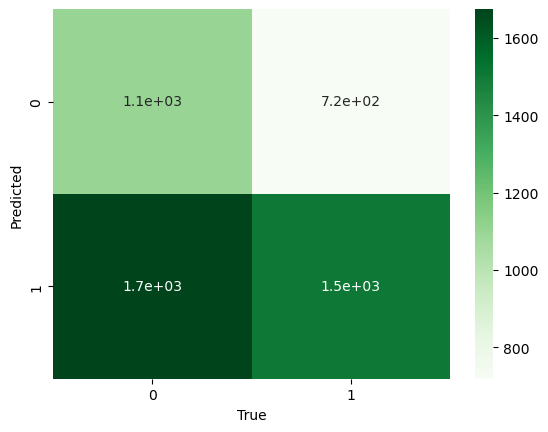

In [46]:
# confusion_matrix
cf = confusion_matrix(y_test_real, y_test_pred) #the y_test_real are those that we know the are the true one
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()